<h1 style = 'background-color:powderblue;border-style: solid'><center><strong><br> US Colleges Scorecard Analysis<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction to the dataset</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#EDA">Exploratory Model</a></li>
<li><a href="#pr">Pridective Model</a></li>

<a id='intro'></a>
## Introduction to the dataset
><a href="https://catalog.data.gov/dataset/most-recent-cohorts-scorecard-elements">Dataset link</a> <br>
><a href="https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf">Technical Documentation: College Scorecard Institution-Level Data</a> <br>
><a href="https://collegescorecard.ed.gov/assets/FieldOfStudyDataDocumentation.pdf">Technical Documentation: College Scorecard Data by Field of Study</a> <br>
>Dataset last update: August 7, 2021

The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students. <br>
College Scorecards make it easier for students to search for a college that is a good fit for them. They can use the College Scorecard to find out more about a college's affordability and value so they can make more informed decisions about which college to attend. 


The original data has (7703 rows and 122 column) <br>

    
 <hr style="height:2px;border-width:5;color:gray;background-color:gray">
    

<div style = 'background-color:#fbfbfb;border-style: solid'>
    <h1> The Notebook splitting to two main parts</h1>
    <h3> Explorative Model</h3>
    <p> Using the US colleges data set I plan to cover all the requirement in the IBM freelancer contest including document the findings in a way that it should be good to be a standalone deliverable.  communicate the insights using the medium of text and graphs and other visual medium to go along with analysis.https://www.freelancer.com/contest/Exploratory-Data-Analysis-1993149 .https://www.freelancer.com/contest/Exploratory-Data-Analysis-1993149 </p>
    <h3>Predictive Model</h3>
    <p> Take IBM Watson Studio for a spin to Create a predictive model using sklearn Random Forest Regressor  algorithms to accurate predict the net price of US colleges. and follow all the requirement in the IBM contest in the link below. <br> https://www.freelancer.com/contest/Data-Science-Predictive-Model-1993148 <br><br></p>
    </div>

## Reading the Original data and Importing the Basic liberaries

In [5]:

import os, types
import pandas as pd
import numpy as np
from botocore.client import Config
pd.set_option('display.max_columns' ,500)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from math import pi


import warnings
warnings.filterwarnings("ignore")



for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
df_data_1 = pd.read_csv(path)

In [6]:
df_data_1.head(2)

,UNITID,OPEID,OPEID6,INSTNM,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,LOCALE,CONTROL,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,MapLocation
0,141936,3072500,30725,World Medicine Institute,HI,http://www.wmi.edu,www.wmi.edu,0,4,21.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,"Honolulu, HI\n(21.30992, -157.858158)"
1,108269,3288300,32883,Academy of Chinese Culture and Health Sciences,CA,http://www.acchs.edu,www.acchs.edu/npcalc.htm,0,4,11.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,"Oakland, CA\n(37.804828, -122.27248)"


## Prepare subset of the data for the Exploratory Model

In [8]:
df_data_1[['State' ,'Map_Location' ]] = df_data_1['MapLocation'].str.split(',', 1, expand=True)
df = df_data_1[['UNITID'  , 'INSTNM' , 'State' , 'PREDDEG' , 'CONTROL' , 'SATVRMID' , 'SATMTMID'  ,'ACTCMMID','ACTENMID' , 'ACTMTMID' ]]

display(df.sample(10).style.set_properties(**{'background-color': '#008294','color': 'White','border': '1.5px  solid black'}))

,UNITID,INSTNM,State,PREDDEG,CONTROL,SATVRMID,SATMTMID,ACTCMMID,ACTENMID,ACTMTMID
5823,439394,East West College of Natural Medicine,Sarasota,4,3,nan,nan,nan,nan,nan
5090,439622,Erie 1 BOCES,West Seneca,1,1,nan,nan,nan,nan,nan
1268,153533,Iowa Lakes Community College,Estherville,2,1,nan,nan,nan,nan,nan
5339,395690,Diversified Vocational College,Los Angeles,1,3,nan,nan,nan,nan,nan
4639,402776,Southwest University of Visual Arts-Albuquerque,Albuquerque,3,3,nan,nan,nan,nan,nan
5643,446215,Day Spa Career College,Ocean Springs,1,3,nan,nan,nan,nan,nan
5818,442073,Lincoln Technical Institute-Paramus,Paramus,1,3,nan,nan,nan,nan,nan
4260,364946,Caddo Kiowa Technology Center,Fort Cobb,1,1,nan,nan,nan,nan,nan
1898,153597,Iowa School of Beauty-Des Moines,Des Moines,1,3,nan,nan,nan,nan,nan
1599,154545,College of Hair Design,Waterloo,1,3,nan,nan,nan,nan,nan


<h2> Exploratory Data set Difinitions

<h3> School Information</h3><ul>
    <li> 'UNITID' : ID</li>
    <li> 'INSTNM' : School Name </li>
    <li> 'STABBR' : State postcode </li>
    <li> 'PREDDEG' : Predominant undergraduate degree awarded<ul>
 <li>0 Not classified
 <li>1 Predominantly certificate-degree granting
 <li>2 Predominantly associate's-degree granting
 <li>3 Predominantly bachelor's-degree granting
 <li>4 Entirely graduate-degree granting </ul></li>
    <li> 'CONTROL' : Control of institution <ul>
 <li>1 Public
 <li>2 Private nonprofit
 <li>3 Private for-profit </ul></li>

</ul>
    <h3> Admission Information</h3><ul>
    <li> 'SATVRMID' : Midpoint of SAT scores at the institution (critical reading)</li>
    <li> 'SATMTMID' : Midpoint of SAT scores at the institution (math)</li>
    <li> 'SATWRMID' : Midpoint of SAT scores at the institution (writing)</li>
    <li> 'ACTCMMID' : Midpoint of the ACT cumulative score</li>
    <li> 'ACTENMID' : Midpoint of the ACT English score</li>
    <li> 'ACTMTMID' : Midpoint of the ACT math score</li>
    <li> 'ACTWRMID' : Midpoint of the ACT writing score</li></ul>

<a id='clean'></a>
## Data Cleaning
>In this section we will check the quality and tideness and completeness of our data frame

In [9]:
print ('number of duplicated rows in the dataset : ' ,  df.duplicated().sum())
print ('Number of Rows and columns in the dataset : ' , df.shape)


number of duplicated rows in the dataset :  0
Number of Rows and columns in the dataset :  (7703, 10)


The below table shows the basic information about the Completion of the dataframe<br>
number of duplicated values in each row<br>
number of unique values<br>
Number of missing values <br>
and type of the column

In [10]:
def Data_information(data):
    """
    A function for investigation the data set 
    input = data frame
    return information data frame
    """
    
    count = data.count()
    unique = data.nunique()
    duplicated = count - unique
    missing = data.isnull().sum()
    typedt = data.dtypes
  


    column_info_dict = {  "Non-Nulls": count,
        "unique vales": unique , 'duplicated':duplicated ,'missing values':missing ,'column type':typedt  , }
    data_information = pd.DataFrame(column_info_dict).style.background_gradient()
    return data_information
Data_information(df)

,Non-Nulls,unique vales,duplicated,missing values,column type
UNITID,7703,7703,0,0,int64
INSTNM,7703,7535,168,0,object
State,7703,2537,5166,0,object
PREDDEG,7703,5,7698,0,int64
CONTROL,7703,3,7700,0,int64
SATVRMID,1195,165,1030,6508,float64
SATMTMID,1208,167,1041,6495,float64
ACTCMMID,1257,22,1235,6446,float64
ACTENMID,1108,23,1085,6595,float64
ACTMTMID,1110,23,1087,6593,float64


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,7703.0,1.663052e+06,6.566910e+06,100654.0,174242.0,230472.0,447652.0,48414501.0
PREDDEG,7703.0,1.799688e+00,1.023986e+00,0.0,1.0,2.0,3.0,4.0
CONTROL,7703.0,2.215371e+00,8.365281e-01,1.0,1.0,2.0,3.0,3.0
SATVRMID,1195.0,5.227590e+02,6.853010e+01,290.0,475.0,513.0,555.0,765.0
SATMTMID,1208.0,5.304247e+02,7.329733e+01,310.0,481.5,517.5,565.0,785.0
ACTCMMID,1257.0,2.320366e+01,3.432918e+00,14.0,21.0,23.0,25.0,35.0
ACTENMID,1108.0,2.285018e+01,3.863190e+00,13.0,20.0,22.0,25.0,35.0
ACTMTMID,1110.0,2.265405e+01,3.432875e+00,13.0,21.0,22.0,24.0,36.0


### Data Cleaning Findings and Observation
>Thier were no duplicated rows in the dataframe<br>
>421 null values in all Collages Flags column  - will be filled (NO Information Provided)<br>
>Very big number of Null values in the SAT score and ACT score , After investigation I found all the colleges provided graduated degree or not classified type has all Null values , that will be taken in considration during the analysis<br>
>Flags Columns were a binary columns contain either 0 for (no) and 1 for (yes)<br>
>No outliers shown in the numircal analysis<br>
>Three types for "CONTROL" column either (public , private for profit or private for non profit)with no missing values<br>
>Five types for "PREDDEG" depend on the degree granting ie(Bachelor , Associate  , Entirely graduate ,..etc) with no missing values<br>

<a id='EDA'></a>
## Exploratory Data Analysis
>Here goes our visualization

<h1 style = 'background-color:powderblue;border-style: solid'><center><strong><br> Explorative Model<br>

<div style = 'background-color:#fbfbfb;border-style: solid'>
    <h3> Exploratory Research Questions</h3>
<ul>
    <li>Visualizing the percenatge of US  Colleges accrding to Control type (public / private) and Degree granting (bachelor ,associate  ,etc.. )</li>
    <li>Visualizing the relation between the Control type and the Degree granting</li>
    <li>Visualizing the distribution of the Colleges across US</li>
    <li>Visualizing The distribution of SAT and Scores accross the degree granting</li></ul>
    </div>

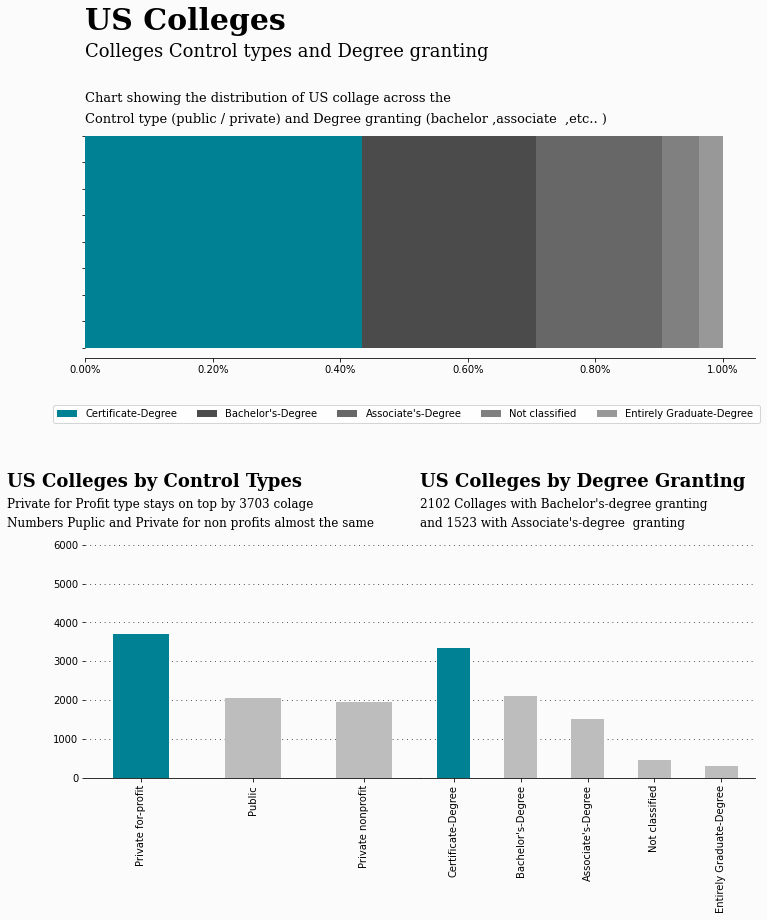

In [12]:
# Setting up figure and axes
fig = plt.figure(figsize=(12,12)) # create figure
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0], ylim=(0, 6000)) # create axes
ax2 = fig.add_subplot(gs[1, 1], ylim=(0, 6000)) # create axes


# Color selection
color_map = ["#bdbdbd" for _ in range(5)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

"""

    0 Not classified
    1 Predominantly certificate-degree granting
    2 Predominantly associate's-degree granting
    3 Predominantly bachelor's-degree granting
    4 Entirely graduate-degree granting 

"""

# Continents
ax0.barh(0, 3343/7703,
       color="#008294", zorder=3, label="Certificate-Degree"
)

ax0.barh(0, 2102/7703, 
       left=3343/7703,
       color="#4b4b4c", zorder=3, label="Bachelor's-Degree"
)

ax0.barh(0, 1523/7703, 
       left=(3343+2102)/7703,
       color="#676767", zorder=3, label="Associate's-Degree"
)

ax0.barh(0, 443/7703, 
       left=(3343+2102+1523)/7703,
       color="#808080", zorder=3, label="Not classified"
)

ax0.barh(0, 292/7703, 
       left=(3343+2102+1523+443)/7703,
       color="#989898", zorder=3, label="Entirely Graduate-Degree "
)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.48, -0.3))

ax0.text(0, 0.8, 
         'US Colleges', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 0.7, 
         'Colleges Control types and Degree granting', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')
ax0.text(0, 0.53, 
         'Chart showing the distribution of US collage across the ', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'Control type (public / private) and Degree granting (bachelor ,associate  ,etc.. )', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# type
df['CONTROL'] = df['CONTROL'].replace([1,2,3], ['Public','Private nonprofit','Private for-profit'])
df.CONTROL.value_counts().plot(kind = 'bar' , ax = ax1 ,color=color_map, zorder=3 )
#asia_country = asia_country_count_df["Country"]
#ax1.bar(asia_country_count_df.iloc[0:5, 0], asia_country_count_df.iloc[0:5, 1], 
       #color=color_map, zorder=3
#)
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#ax1.set_xticklabels(asia_country_count_df['Country'], rotation=90)

ax1.text(-1.2, 7500, 
         'US Colleges by Control Types', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif')

ax1.text(-1.2, 6950, 
         'Private for Profit type stays on top by 3703 colage', 
         fontsize=12, 
         fontweight='light', 
         fontfamily='serif')

ax1.text(-1.2, 6450, 
         'Numbers Puplic and Private for non profits almost the same ', 
         fontsize=12, 
         fontweight='light', 
         fontfamily='serif')


# Certificate
df['PREDDEG'] = df['PREDDEG'].replace([0,1,2,3,4], ['Not classified','Certificate-Degree',
                                                    "Associate's-Degree" , "Bachelor's-Degree" , 
                                                    'Entirely Graduate-Degree'])
df.PREDDEG.value_counts().plot(kind = 'bar' , ax = ax2 ,color=color_map, zorder=3 )
#america_country = america_country_count_df["Country"]
#ax2.bar(america_country_count_df.iloc[0:5, 0], america_country_count_df.iloc[0:5, 1], color=color_map, zorder=3)
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#ax2.set_xticklabels(america_country_count_df['Country'], rotation=90)

ax2.text(-0.5, 7500, 
         'US Colleges by Degree Granting', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif')

ax2.text(-0.5, 6950, 
         '2102 Collages with Bachelor\'s-degree granting', 
         fontsize=12, 
         fontweight='light', 
         fontfamily='serif')

ax2.text(-0.5, 6450, 
         'and 1523 with Associate\'s-degree  granting', 
         fontsize=12, 
         fontweight='light', 
         fontfamily='serif')

# Remove top, right and left line 
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

    
ax0.set_yticklabels([])
ax2.set_yticklabels([])


ax2.tick_params(left=False)



#Cridit of this chart goes to this Kaggle notebook
#https://www.kaggle.com/dwin183287/kagglers-seen-by-continents

<div style = 'background-color:#fbfbfb; border-style: solid'><br>
    <p style = 'text-align: center;'> According to the chart above  , Prvate for profit colleges are the most control type of colleges in US with over than 3700 college   , but still the non-profit type of college  either the (public and private nonprofit) hold a good percenatge of the total number of US Colleges</p>
    <p style = 'text-align: center;'> with respect to the Degree granting  , we can find the colleges provide certificate-degree on the top followed by the colleges provide Bachelor's and associates degree respectivily </p><br>
    </div>

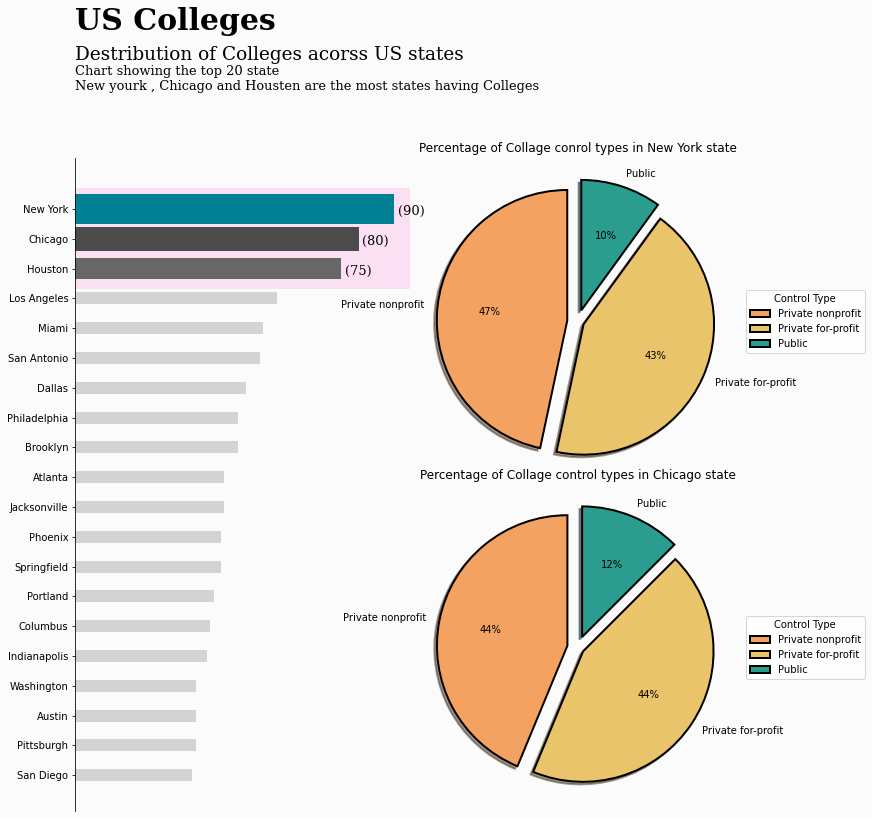

In [13]:
h = np.array([0.4,0.4 ,0.4 ,0.4 ,0.4 ,0.4,0.4 ,0.4,
             0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.7,0.8,1])
#Set the Colors of the bars
c = np.array(['lightgray','lightgray' ,'lightgray' ,'lightgray' ,'lightgray' ,'lightgray',
              'lightgray' ,'lightgray',
             'lightgray','lightgray','lightgray'
              ,'lightgray','lightgray','lightgray','lightgray',
              'lightgray','lightgray','#676767','#4b4b4c','#008294'])


fig = plt.figure(figsize=(12,12) ) # create figure
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0:2, 0])
ax1 = fig.add_subplot(gs[0, 1], ylim=(0, 6000)) # create axes
ax2 = fig.add_subplot(gs[1, 1], ylim=(0, 6000)) # create axes


# Color selection
color_map = ["#bdbdbd" for _ in range(5)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color


df_STABBR = df.groupby ('State').size().sort_values().reset_index().rename(mapper={0:'count'} , axis = 1).tail(20)

ax0.barh(df_STABBR.State ,df_STABBR['count'] , height=h, color = c)
ax0.axhspan(ymin = 16.3 , ymax = 19.7 , fc='#ff73d5', alpha=0.2 , zorder=0)

ax0.text(0, 25, 
         'US Colleges', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 24, 
         'Destribution of Colleges acorss US states', 
         fontsize=18.5, 
         fontweight='light', 
         fontfamily='serif')
ax0.text(0, 23.5, 
         'Chart showing the top 20 state   ', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 23, 
         'New yourk , Chicago and Housten are the most states having Colleges', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(91, 18.8, 
         '(90)', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(81, 17.8, 
         '(80)', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')
ax0.text(76, 16.8, 
         '(75)', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

for s in ["top","right","bottom"]:
    ax0.spines[s].set_visible(False)


ax0.set_xticks([])



explode = (0.08, 0.05, 0.09)

# Change default colors:
colors = ('#f4a261'  , '#e9c46a', '#2a9d8f')

# Wedge properties
wp = { 'linewidth' : 2, 'edgecolor' : "#000000" }


values = [42,39,9]
labels = ['Private nonprofit' , 'Private for-profit'  , 'Public']
# Drow Plot
ax1.pie(values, explode = explode,
        labels = labels,shadow = True,
        colors= colors,
        wedgeprops = wp,
        autopct='%1.0f%%',
       startangle = 90 )

# Adding legend
ax1.legend(labels,
          title ="Control Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 1, 1))

# Adding title to pie chart
ax1.set_title("Percentage of Collage conrol types in New York state")

##############################

colors = ('#f4a261'  , '#e9c46a', '#2a9d8f')
values = [35,35,10]
labels = ['Private nonprofit' , 'Private for-profit'  , 'Public']
# Drow Plot
ax2.pie(values, explode = explode,
        labels = labels,shadow = True,
        colors= colors,
        wedgeprops = wp,
        autopct='%1.0f%%',
       startangle = 90 )

# Adding legend
ax2.legend(labels,
          title ="Control Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 1, 1))

# Adding title to pie chart
ax2.set_title("Percentage of Collage control types in Chicago state")

# Show plot
plt.show()

<div style = 'background-color:#fbfbfb; border-style: solid'><br>
    <p style = 'text-align: center;'> Chart shows the distribution of colleges across US states and it seems to me it's equaly distributed , the top states were New York with total 90 colleges  , Chicago with 80 colleges and Housten with 75 colleges</p>
    <p style = 'text-align: center;'> Also I add the two Pie charts showing the percentage of the Control type for the top two states  and interestingly the percentage of Public colleges was very low comparing to the private ones </p>
    <br></div>

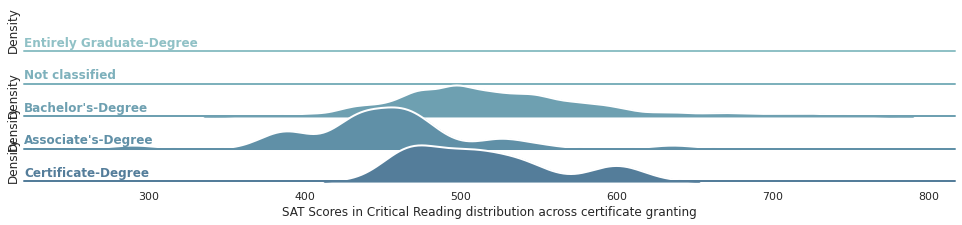

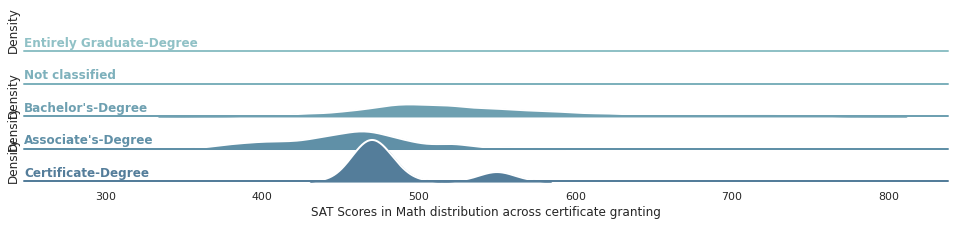

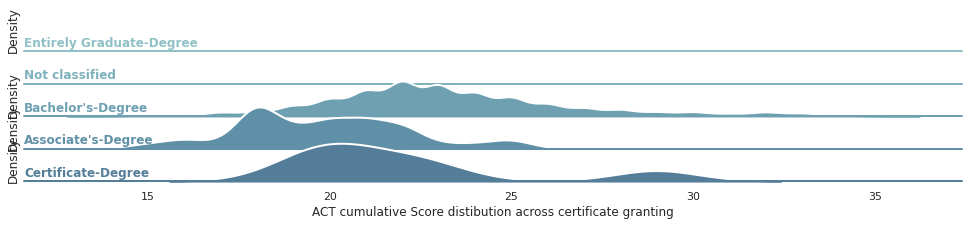

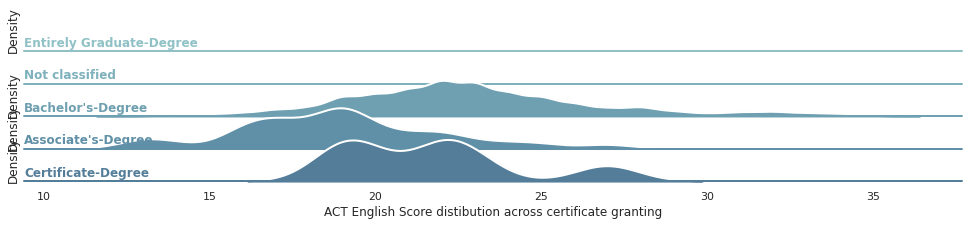

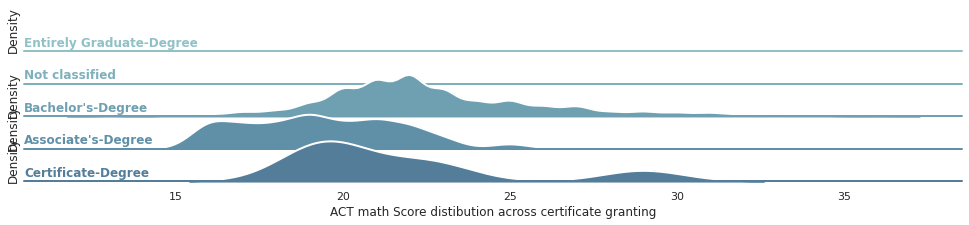

In [15]:
df.rename({'SATVRMID' : 'SAT Scores in Critical Reading distribution across certificate granting',
           'SATMTMID' : 'SAT Scores in Math distribution across certificate granting', 
           'ACTCMMID' :'ACT cumulative Score distibution across certificate granting', 
           'ACTENMID' : 'ACT English Score distibution across certificate granting', 
           'ACTMTMID' :'ACT math Score distibution across certificate granting'
          } , axis = 1 , inplace  = True)


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    # Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
columns = ['SAT Scores in Critical Reading distribution across certificate granting',
          'SAT Scores in Math distribution across certificate granting', 
          'ACT cumulative Score distibution across certificate granting',
          'ACT English Score distibution across certificate granting',
          'ACT math Score distibution across certificate granting']

for column in columns:

    g = sns.FacetGrid(df, row="PREDDEG", hue="PREDDEG", aspect=20, height=.7, palette=pal);

    # Draw the densities in a few steps
    g.map(sns.kdeplot, column,
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, column, clip_on=False, color="w", lw=2, bw_adjust=.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    g.map(label, column)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

<div style = 'background-color:#fbfbfb;border-style: solid'>
    <h3>Distribution of SAT and ACT scores accross the Degree granting</h3>
<p>It was noted that all colleges provide Entirely graduated Degrees or not classified colleges has Null values in reagrd of the SAT and ACT scores. <br>
    also the mean scores for the collages provided Associate's-Degree is less than the mean of the other colleges provided Bechelor or Certificate degrees</p><br>
    </div>

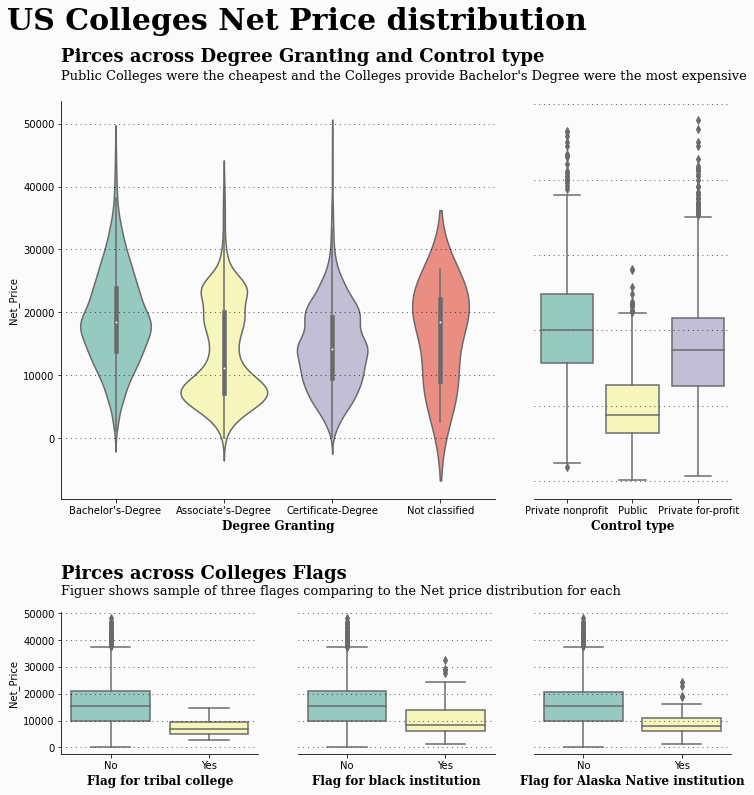

In [16]:
#reset the sns style
sns.reset_orig()

#Net_price column
df [['NPT4_PUB' , 'NPT4_PRIV']] = df_data_1[['NPT4_PUB' , 'NPT4_PRIV']]
#sum the price for public and private colleges
df.NPT4_PUB =  df.NPT4_PUB.fillna(0)
df.NPT4_PRIV =  df.NPT4_PRIV.fillna(0)
df['Net_Price'] = df.NPT4_PUB + df.NPT4_PRIV
df.Net_Price = df.Net_Price .apply (lambda x: np.nan if x<1 else x)
df.Net_Price = df.Net_Price .apply (lambda x: np.nan if x>55000 else x)


#drop the private and puplic net price columns
df.drop(['NPT4_PUB' , 'NPT4_PRIV'] , axis = 1 , inplace = True)


#1113 collage had no information about the net price , will reduce the data frame with the non-values only 
df =df[df['Net_Price'].notnull()]


columns = [ 'HBCU', 'PBI','ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI']
df[columns] = df_data_1[columns]

df.HBCU = df.HBCU.apply(lambda x: 'Yes' if x == 1 else "No")
df.PBI = df.PBI.apply(lambda x: 'Yes' if x == 1 else "No")
df.ANNHI = df.ANNHI.apply(lambda x: 'Yes' if x == 1 else "No")
df.TRIBAL = df.TRIBAL.apply(lambda x: 'Yes' if x == 1 else "No")
df.AANAPII = df.AANAPII.apply(lambda x: 'Yes' if x == 1 else "No")
df.HSI = df.HSI.apply(lambda x: 'Yes' if x == 1 else "No")
df.NANTI = df.NANTI.apply(lambda x: 'Yes' if x == 1 else "No")



#prepare the layout
fig = plt.figure(figsize=(12,12) ) # create figure
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.8)
ax0 = fig.add_subplot(gs[0:2, 0:2])# create axes
ax1 = fig.add_subplot(gs[0:2, 2]) # create axes
ax2 = fig.add_subplot(gs[2, 0]) # create axes
ax3 = fig.add_subplot(gs[2, 1]) # create axes
ax4 = fig.add_subplot(gs[2, 2]) # create axes


# Color selection
color_map = ["#bdbdbd" for _ in range(5)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color


sns.violinplot(x="PREDDEG", y="Net_Price", data=df, palette="Set3" , ax = ax0)
sns.boxplot(x="CONTROL", y="Net_Price", data=df, palette="Set3" , ax = ax1)
sns.boxplot(x="TRIBAL", y="Net_Price", data=df, palette="Set3" , ax = ax2)
sns.boxplot(x="PBI", y="Net_Price", data=df, palette="Set3" , ax = ax3)
sns.boxplot(x="ANNHI", y="Net_Price", data=df, palette="Set3" , ax = ax4)

#Remove yticks
ax_list = [ax1 , ax3 , ax4]
for axes in ax_list:
    axes.set_yticklabels([])
    axes.tick_params(left=False)
    axes.set(ylabel='')
    axes.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    
# Remove top, right and left line 
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)

    
ax2.set_xlabel('Flag for tribal college' ,fontweight='bold', fontfamily='serif'  , fontsize  = 12)
ax3.set_xlabel('Flag for black institution' ,fontweight='bold', fontfamily='serif' , fontsize  = 12 )
ax4.set_xlabel('Flag for Alaska Native institution' ,fontweight='bold', fontfamily='serif' , fontsize  = 12)
ax0.set_xlabel('Degree Granting' ,fontweight='bold', fontfamily='serif', fontsize  = 12 )
ax1.set_xlabel('Control type' ,fontweight='bold', fontfamily='serif', fontsize  = 12 )

for s in ["top","right"]:
    ax0.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))



ax0.text(-1,65000,'US Colleges Net Price distribution' , 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif' )
ax0.text(-.5,60000,'Pirces across Degree Granting and Control type' , 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif' )
ax0.text(-.5,57000,'Public Colleges were the cheapest and the Colleges provide Bachelor\'s Degree were the most expensive' , 
         fontsize=13,  
         fontfamily='serif' )


ax2.text(-.5,63000,'Pirces across Colleges Flags' , 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif' )
ax2.text(-.5,57000,'Figuer shows sample of three flages comparing to the Net price distribution for each' , 
         fontsize=13,  
         fontfamily='serif' );


<div style = 'background-color:#fbfbfb; border-style: solid'><br>
    <p style = 'text-align: center;'> Chart shows the distribution of Net prices for colleges accros several variables</p>
    <p style = 'text-align: center;'> Degree granting : we can find the colleges provide Bachelor's degree were the most expensive and the colleges provide Associate's degree were the cheapest</p>
    <p style = 'text-align: center;'> Control type : Logically the public colleges were the cheapest but interistingly the Private nonprofit colleges were expensive more than the privat for profit colleges</p>
    <p style = 'text-align: center;'> Colleges Flags : chart shows sample of net price distribution across three flags (tribal , black institution and Alaska Native institution) </p>
    <br></div>

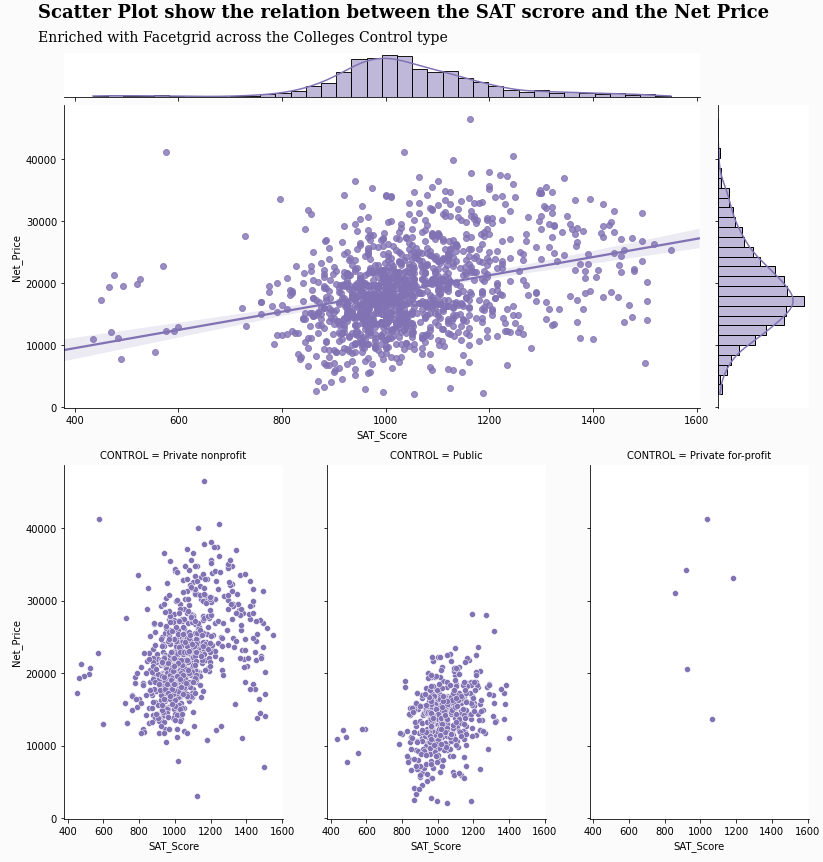

In [18]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())
#Cridit goes to
#https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
#Feature engineering one column for SAT
df[['SATVRMID' , 'SATMTMID']] = df_data_1[['SATVRMID' , 'SATMTMID']]
df.SATVRMID.fillna(0 , inplace = True)
df.SATMTMID.fillna(0 , inplace = True)
df['SAT_Score'] = df.SATVRMID +df.SATMTMID
df.drop(['SATVRMID' , 'SATMTMID'] , axis  = 1  , inplace  = True)
df0 =df[df['SAT_Score']!=0]



# An lmplot
g0 = sns.jointplot(x="SAT_Score", y="Net_Price", data=df0,
                  kind="reg", truncate=False,
                  color="m", height=7 )
plt.text(-1100,63000,'Scatter Plot show the relation between the SAT scrore and the Net Price ' , fontsize = 18 , fontweight='bold', 
         fontfamily='serif')
plt.text(-1100,59000,'Enriched with Facetgrid across the Colleges Control type ' , fontsize = 14 , 
         fontfamily='serif')
g1 =  sns.FacetGrid(df0, col="CONTROL")
g1.map(sns.scatterplot, "SAT_Score", "Net_Price" , color="m")



fig = plt.figure(figsize=(12,12))

# Color selection
color_map = ["#bdbdbd" for _ in range(5)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)


gs = gridspec.GridSpec(2,1)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])


gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()

<div style = 'background-color:#fbfbfb; border-style: solid'><br>
    <p style = 'text-align: center;'> Here we are presenting a scatter plot showing the relation between the SAT score and the college Net price</p>
    <p style = 'text-align: center;'> the chart was enriched with a facet grid showing the same relation taking in considration the colleges control type</p>
    <p style = 'text-align: center;'> overall thier is a week positive corelation however the data set contain alot of null values which effect the cridability of the chart</p>
    <br></div>

In [19]:
df2 = df.groupby('PREDDEG')['Net_Price'].mean().reset_index().rename({'Net_Price':'Average_Net_Price'} , axis =1)
df2

,PREDDEG,Average_Net_Price
0,Associate's-Degree,13668.262764
1,Bachelor's-Degree,19054.304903
2,Certificate-Degree,14590.370676
3,Not classified,16667.916667


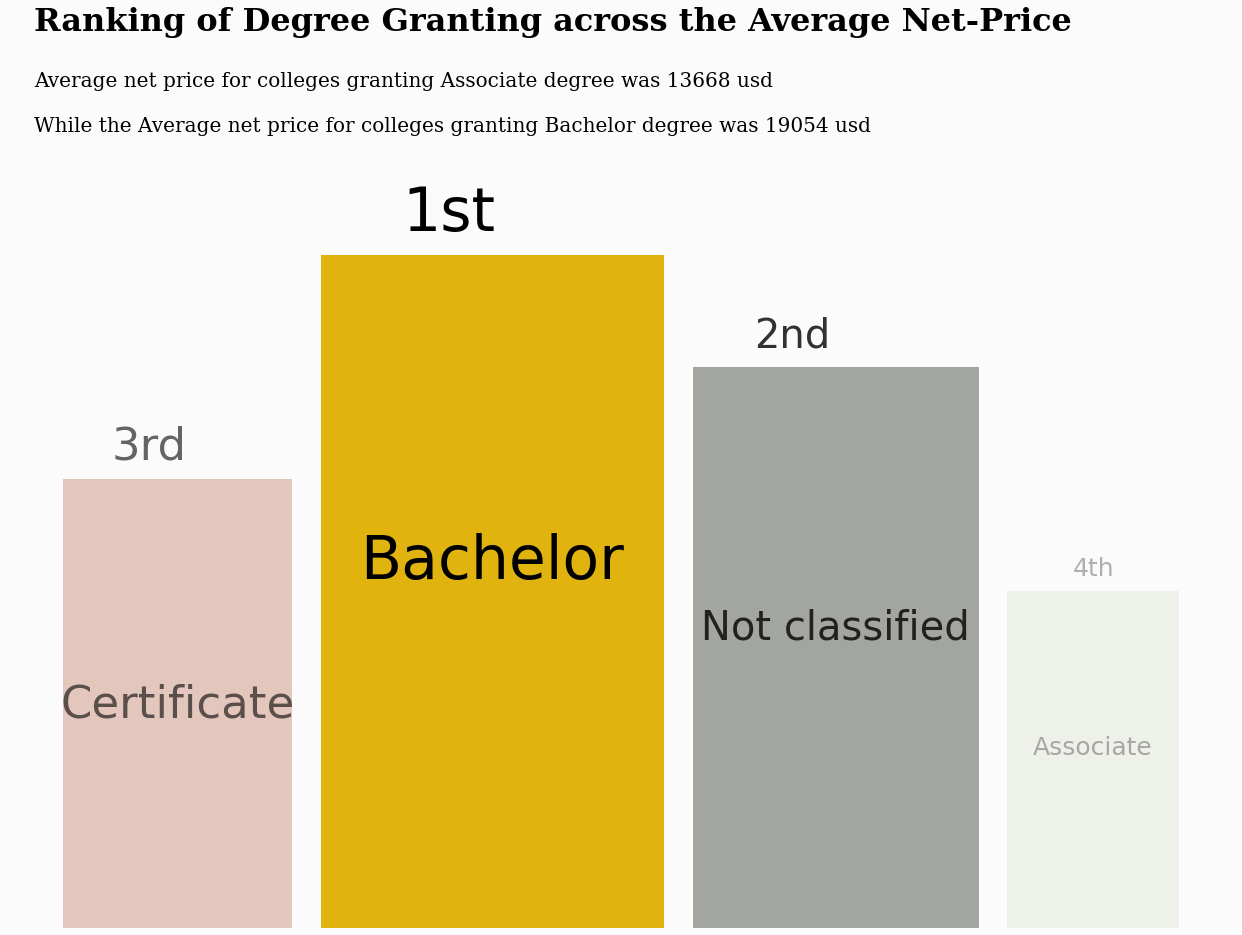

In [20]:
fig = plt.figure(figsize=(22,13) , facecolor="#fbfbfb")
x = [2.5,3.6,4.8,5.7]
y = [4,6,5,3]
width = [ 0.8, 1.2, 1.0, 0.6]
color = ['#D4A492','#E0B30E','#8D918A','#D0D9C3']

s_num = ['3rd','1st','2nd','4th']

fontsize= [ 45, 60, 40, 25]
x_num = [2.4,3.45,4.65,5.7]
x_char = [2.62,3.7,4.9,5.78]
y_char = [4,5.95,5,3.05]
alpha = [ 0.6, 1, 0.8, 0.3]
s = ['Certificate','Bachelor','Not classified','Associate']
s_position = [ 1.8, 3, 2.5, 1.5]

for i in range(4):
    plt.bar(x=x[i],height=y[i],width=width[i],color=color[i],alpha=alpha[i])
    plt.text(s=s[i],x=x[i],y=s_position[i],va='bottom',ha='center',fontsize=fontsize[i],alpha=alpha[i])
    plt.text(s=s_num[i],x=x_num[i],y=y[i]+0.1,va='bottom',ha='center',fontsize=fontsize[i],alpha=alpha[i])
    #plt.text(s=s_char[i],x=x_char[i],y=y_char[i],va='bottom',ha='center',fontsize=fontsize[i]-25,alpha=alpha[i])
    
plt.text(2,8,'Ranking of Degree Granting across the Average Net-Price' , fontsize = 32  , fontweight='bold', 
         fontfamily='serif')
plt.text(2,7.5,'Average net price for colleges granting Associate degree was 13668 usd' , fontsize = 20  ,  
         fontfamily='serif')
plt.text(2,7.1,'While the Average net price for colleges granting Bachelor degree was 19054 usd' , fontsize = 20  ,  
         fontfamily='serif')

plt.axis('off')
plt.show()

<div style = 'background-color:#fbfbfb; border-style: solid'><br>
    <p style = 'text-align: center;'> A fancy chart was Build to emphasize our think in the colleges net price across the degree granting</p>
    <p style = 'text-align: center;'> Average net price for colleges granting Associate degree was 13668 usd</p>
    <p style = 'text-align: center;'> while the Average net price for colleges granting Bachelor degree was 19054 usdt</p>
    <br></div>

<a id='pr'></a>
# Predictive model 

<h1 style = 'background-color:powderblue;border-style: solid'><center><strong><br> Pridective Model<br>

## Objective
Build a predictive model to predict the fair net price for each college  (public institutions)and (private for-profit and nonprofit institutions)

## Context
Does your college deserve the net price paid for it ?<br>
Whether you’re just beginning to build your college list, or if you’re narrowing down some choices you’ve already made, one of the top factors in many students’ decision is, you guessed it: money.  Most of us know college can be expensive, but what you might not know is that college doesn’t cost the same amount of money for every student. <br>
<b>College can and should be affordable. That’s why we’re here to help you.</b>

## Approch
Using the College scorecard dataset we will use some predictor factors including some information on the school itself  , information about the admission requirement  , information about the earning and aid to predict the fair price of the colleges using Random forrest regressor 

In [21]:
df_data_1.head(1)

,UNITID,OPEID,OPEID6,INSTNM,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,LOCALE,CONTROL,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,MapLocation,State,Map_Location
0,141936,3072500,30725,World Medicine Institute,HI,http://www.wmi.edu,www.wmi.edu,0,4,21.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,"Honolulu, HI\n(21.30992, -157.858158)",Honolulu,"HI\n(21.30992, -157.858158)"


## Problem Defintion

In this model we  will try to predict the Average net price for  (public institutions)and  (private for-profit and nonprofit institutions)

## Preparing the Y  - Net price
There are several elements in the dataset that describe the average net
price, derived from the full cost of attendance (including tuition and
fees, books and supplies, and living expenses) minus federal, state, and
institutional grant/scholarship aid, for full-time, first-time
undergraduate Title IV-receiving students. Average net price (NPT4_*
for _PUB [public colleges; for public institutions, this metric is limited to
those undergraduates who pay in-state tuition] and _PRIV [private
colleges]) includes a weighted average of all full-time, first-time
undergraduate Title IV-receiving students<br><p>
    we will create a new column (Net-Price) contain the average net prices for the public and the private colleges </p>

In [22]:
#Create new predection data fram
dfp = df_data_1[['NPT4_PUB' , 'NPT4_PRIV']]
#sum the price for public and private colleges
dfp.NPT4_PUB =  dfp.NPT4_PUB.fillna(0)
dfp.NPT4_PRIV =  dfp.NPT4_PRIV.fillna(0)
dfp['Net_Price'] = dfp.NPT4_PUB + dfp.NPT4_PRIV
#Remove the outlyers and replace it with nan
dfp.Net_Price = dfp.Net_Price .apply (lambda x: np.nan if x<1 else x)
dfp.Net_Price = dfp.Net_Price .apply (lambda x: np.nan if x>55000 else x)

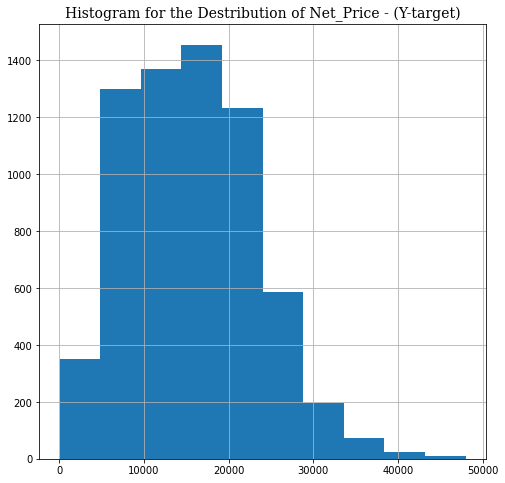

In [23]:
fig , ax = plt.subplots(figsize = (8,8))
dfp.Net_Price.hist()
plt.title ('Histogram for the Destribution of Net_Price - (Y-target)' , fontsize = 14 , fontfamily='serif');

## Building the  dataframe and selecting the predicting features
### predicting features as follow:<br><br>
<ul>
    <li><strong>School </strong></li>
        <ul>
    <li> <strong>STABBR: </strong> State of the college</li>
    <li> <strong>PREDDEG: </strong> Predominant degree awarded (recoded 0s and 4s)</li>
    <li> <strong>CONTROL: </strong> Control of institution (public /Private) </li>
    <li> <strong>HBCU: </strong> Flag for Historically Black College and University </li>
    <li> <strong>PBI:</strong>  Flag for predominantly black institution </li>
    <li> <strong>ANNHI: </strong> Flag for Alaska Native Native Hawaiian serving institution </li>
    <li> <strong>TRIBAL: </strong> Flag for tribal college and university </li>
    <li> <strong>AANAPII: </strong> Flag for Asian American Native American Pacific Islander-serving institution</li>
    <li> <strong>HSI: </strong> Flag for Hispanic-serving institution</li>
    <li> <strong>NANTI:  </strong> Flag for Native American non-tribal institution</li><br><br>
        </ul>
    <li> <strong>Admissions </strong> </li>
        <ul>
    <li> <strong>SATVRMID: </strong> Midpoint of SAT scores at the institution (critical reading)</li>
    <li> <strong>SATMTMID: </strong> Midpoint of SAT scores at the institution (math)</li>
    <li> <strong>ACTCMMID: </strong> Midpoint of the ACT cumulative score</li>
    <li> <strong>ACTENMID: </strong> Midpoint of the ACT English score</li>
    <li> <strong>ACTMTMID: </strong> Midpoint of the ACT math score</li>
    <li> <strong>SAT_AVG: </strong> Average SAT equivalent score of students admitted</li>
    <li> <strong>SAT_AVG_ALL: </strong>Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID </li><br><br>
        </ul>
    <li> <strong>Earning</strong></li>
        <ul>
    <li> <strong>MD_EARN_WNE_P10: </strong> Median earnings of students working and not enrolled 10 years after entry</li>
    <li> <strong>GT_25K_P6:  </strong>Share of students earning over 25,000 USD per year (threshold earnings) 6 years after entry </li><br><br>
    </ul>
     <li> <strong>Aid </strong></li>
         <ul>
    <li> <strong>GRAD_DEBT_MDN_SUPP:  </strong> Median debt of completers, suppressed for n=30</li>
    <li> <strong>GRAD_DEBT_MDN10YR_SUPP: </strong> Median debt of completers expressed in 10-year monthly payments, suppressed for n=30</li><br><br>
         </ul>
    <li> <strong>repayment</strong></li>
        <ul>
    <li> <strong>RPY_3YR_RT_SUPP: </strong> 3-year repayment rate for dependent students, suppressed for n=30 </li>
        </ul>
        </ul>


In [24]:
#seclect features 
columns = ['STABBR' ,'PREDDEG', 'LOCALE', 'CONTROL', 'HBCU', 'PBI',
           'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI','SATVRMID', 'SATMTMID' ,'ACTCMMID', 'ACTENMID', 
           'ACTMTMID'  , 'SAT_AVG','SAT_AVG_ALL'  , 'MD_EARN_WNE_P10' , 'GT_25K_P6' , 'GRAD_DEBT_MDN_SUPP'
           , 'GRAD_DEBT_MDN10YR_SUPP' , 'RPY_3YR_RT_SUPP']
dfp[columns] = df_data_1[columns]

In [25]:
dfp.head()

,NPT4_PUB,NPT4_PRIV,Net_Price,STABBR,PREDDEG,LOCALE,CONTROL,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,SATVRMID,SATMTMID,ACTCMMID,ACTENMID,ACTMTMID,SAT_AVG,SAT_AVG_ALL,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP
0,0.0,0.0,NaN,HI,4,21.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,0.0,0.0,NaN,CA,4,11.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,NaN
2,0.0,0.0,NaN,NY,4,11.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,0.0,0.0,NaN,PA,4,13.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,NaN
4,0.0,0.0,NaN,PA,4,21.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97000,0.956,4229,43.4018481163705,PrivacySuppressed


## Investigating the Prediction datafram
Here we are goint to check the duplication and the missing values in addition to perform a numirical investigation for each column

In [26]:
Data_information(dfp)

,Non-Nulls,unique vales,duplicated,missing values,column type
NPT4_PUB,7703,1801,5902,0,float64
NPT4_PRIV,7703,4280,3423,0,float64
Net_Price,6590,5832,758,1113,float64
STABBR,7703,59,7644,0,object
PREDDEG,7703,5,7698,0,int64
LOCALE,7282,13,7269,421,float64
CONTROL,7703,3,7700,0,int64
HBCU,7282,2,7280,421,float64
PBI,7282,2,7280,421,float64
ANNHI,7282,2,7280,421,float64


In [27]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
NPT4_PUB,7703.0,2387.734389,4763.367003,-2434.0,0.0,0.0,0.00,28201.0
NPT4_PRIV,7703.0,11094.777100,10552.631537,-581.0,0.0,11559.0,19655.00,89406.0
Net_Price,6590.0,15714.913505,7535.742716,47.0,9620.0,15329.5,20802.25,47994.0
PREDDEG,7703.0,1.799688,1.023986,0.0,1.0,2.0,3.00,4.0
LOCALE,7282.0,19.620434,9.366024,-3.0,12.0,21.0,22.00,43.0
CONTROL,7703.0,2.215371,0.836528,1.0,1.0,2.0,3.00,3.0
HBCU,7282.0,0.014282,0.118658,0.0,0.0,0.0,0.00,1.0
PBI,7282.0,0.013046,0.113479,0.0,0.0,0.0,0.00,1.0
ANNHI,7282.0,0.004944,0.070142,0.0,0.0,0.0,0.00,1.0
TRIBAL,7282.0,0.004669,0.068175,0.0,0.0,0.0,0.00,1.0


## Data Manupilation pipe line
<ul>
    <li> Drop un-needed column ('NPT4_PUB' , 'NPT4_PRIV') as we will depend on the new prepared column (Net-Price) in our prediction</li>
    <li> 1113 collage had no information about the net price , will reduce the data frame with the non-values only </li>
    <li> Remove the 'PrivacySuppressed' and replace it with nan values in the (Earning , Aid and repayment ) columns </li>
    <li> Convirt the (Earning , Aid and repayment ) columns from object to float64 type</li>
    <li> Label encoder for the STABBR column using sklearn LabelEncoder()</li>
    <li> for column MD_EARN_WNE_P10 , remove outlayers and replace the nan with the mean</li>
    <li> for column GT_25K_P6 , fill nan with the mean </li>
    <li> for column GRAD_DEBT_MDN_SUPP remove the outlayers and fill the nan vlaues with the mean </li>
    <li> for column GRAD_DEBT_MDN10YR_SUPP remove the outlayers and fill the nan vlaues with the mean </li>
    <li> for column RPY_3YR_RT_SUPP fill nan vlaues with the mean</li>
    <li> <b>Feature engineering</b> , Create a new column represent the SAT score and drop the columns ( 'SATVRMID' , 'SATMTMID')</li>
    <li> <b>Feature engineering</b> , Create a new column represent the Average SAT score and drop the columns ( 'SAT_AVG' , 'SAT_AVG_ALL')</li>
    <li> <b>Feature engineering</b> , Create a new column represent the ACT score and drop the columns ( 'ACTCMMID' , 'ACTENMID' , 'ACTMTMID')</li>

In [28]:
#drop the private and puplic net price columns
dfp.drop(['NPT4_PUB' , 'NPT4_PRIV'] , axis = 1 , inplace = True)


#1113 collage had no information about the net price , will reduce the data frame with the non-values only 
dfp =dfp[dfp['Net_Price'].notnull()]


#Remove the 'PrivacySuppressed' and replace it with nan values

dfp.MD_EARN_WNE_P10 = dfp.MD_EARN_WNE_P10.apply(lambda x: np.nan if x =='PrivacySuppressed' else x)
dfp.GT_25K_P6 = dfp.GT_25K_P6.apply(lambda x: np.nan if x =='PrivacySuppressed' else x)
dfp.GRAD_DEBT_MDN_SUPP = dfp.GRAD_DEBT_MDN_SUPP.apply(lambda x: np.nan if x =='PrivacySuppressed' else x)
dfp.GRAD_DEBT_MDN10YR_SUPP = dfp.GRAD_DEBT_MDN10YR_SUPP.apply(lambda x: np.nan if x =='PrivacySuppressed' else x)
dfp.RPY_3YR_RT_SUPP = dfp.RPY_3YR_RT_SUPP.apply(lambda x: np.nan if x =='PrivacySuppressed' else x)



# Convert columns to float

dfp['GT_25K_P6'] = pd.to_numeric(dfp['GT_25K_P6'])
dfp['MD_EARN_WNE_P10'] = pd.to_numeric(dfp['MD_EARN_WNE_P10'])
dfp['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(dfp['GRAD_DEBT_MDN_SUPP'])
dfp['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(dfp['GRAD_DEBT_MDN10YR_SUPP'])
dfp['RPY_3YR_RT_SUPP'] = pd.to_numeric(dfp['RPY_3YR_RT_SUPP'])


#Label encoder for the STABBR
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfp.STABBR = le.fit_transform(dfp.STABBR)

#MD_EARN_WNE_P10 , remove outlayers and replace the nan with the mean
dfp.MD_EARN_WNE_P10 = dfp.MD_EARN_WNE_P10.apply(lambda x : np.nan if x>80000 else x)
dfp.MD_EARN_WNE_P10.fillna(dfp.MD_EARN_WNE_P10.mean() , inplace = True)

#GT_25K_P6 , fill nan with the mean
dfp.GT_25K_P6.fillna(dfp.GT_25K_P6.mean() , inplace  = True)

#GRAD_DEBT_MDN_SUPP remove the outlayers and fill the nan vlaues with the mean
dfp.GRAD_DEBT_MDN_SUPP = dfp.GRAD_DEBT_MDN_SUPP.apply(lambda x : np.nan if x>40000 else x)
dfp.GRAD_DEBT_MDN_SUPP.fillna(dfp.GRAD_DEBT_MDN_SUPP.mean() , inplace = True)

#GRAD_DEBT_MDN10YR_SUPP remove the outlayers and fill the nan vlaues with the mean
dfp.GRAD_DEBT_MDN10YR_SUPP = dfp.GRAD_DEBT_MDN10YR_SUPP.apply(lambda x : np.nan if x>400 else x)
dfp.GRAD_DEBT_MDN10YR_SUPP.fillna(dfp.GRAD_DEBT_MDN10YR_SUPP.mean() , inplace = True)

#RPY_3YR_RT_SUPP fill nan vlaues with the mean
dfp.RPY_3YR_RT_SUPP.fillna(dfp.RPY_3YR_RT_SUPP.mean() , inplace = True)

#Feature engineering one column for SAT
dfp.SATVRMID.fillna(0 , inplace = True)
dfp.SATMTMID.fillna(0 , inplace = True)
dfp['SAT'] = dfp.SATVRMID +dfp.SATMTMID
dfp.drop(['SATVRMID' , 'SATMTMID'] , axis  = 1  , inplace  = True)


#Feature engineering one column for SAT_Avg
dfp.SAT_AVG.fillna(0 , inplace = True)
dfp.SAT_AVG_ALL.fillna(0 , inplace = True)
dfp['SAT_AVG'] = dfp.SAT_AVG +dfp.SAT_AVG_ALL
dfp.drop(['SAT_AVG' , 'SAT_AVG_ALL'] , axis  = 1  , inplace  = True)


#Feature engineering one column for ACT Score 
dfp.ACTCMMID.fillna(0 , inplace = True)
dfp.ACTENMID.fillna(0 , inplace = True)
dfp.ACTMTMID.fillna(0 , inplace = True)
dfp['ACT_Score'] = dfp.ACTCMMID +dfp.ACTENMID+dfp.ACTMTMID
dfp.drop(['ACTCMMID' , 'ACTENMID' , 'ACTMTMID'] , axis  = 1  , inplace  = True)

## Prepare the X and y for pridiction

In [29]:
y = dfp.Net_Price.values
X = dfp.drop('Net_Price' , axis = 1).values

## Split train and test dataframe

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, 
                                                    random_state=42)

## Set the regressor using RandomForest Regressor 

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

## Prediction

In [32]:
train_prediction =  regr.predict(X_train)
test_predection = regr.predict(X_test)

## Plot the Original net price VS the predicted net ptice for the first 100 college for train and test data set

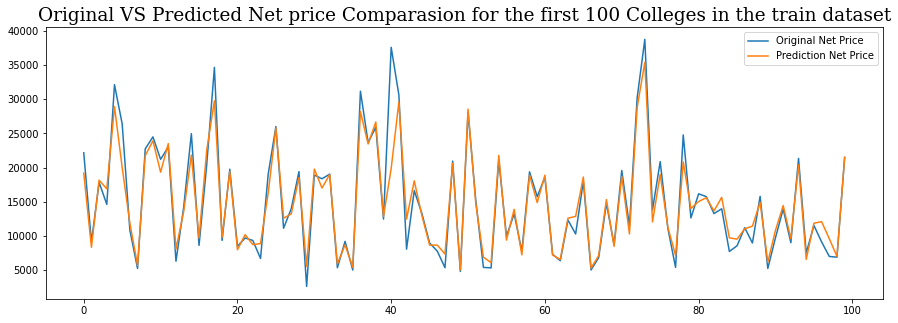

In [33]:
Fig , ax = plt.subplots(figsize = (15 ,5))
ax.plot(y_train[0:100]  , label = 'Original Net Price')
ax.plot(train_prediction[0:100] , label = 'Prediction Net Price' )
plt.legend()
plt.title('Original VS Predicted Net price Comparasion for the first 100 Colleges in the train dataset' , fontsize=18.5, 
         fontweight='light', 
         fontfamily='serif');


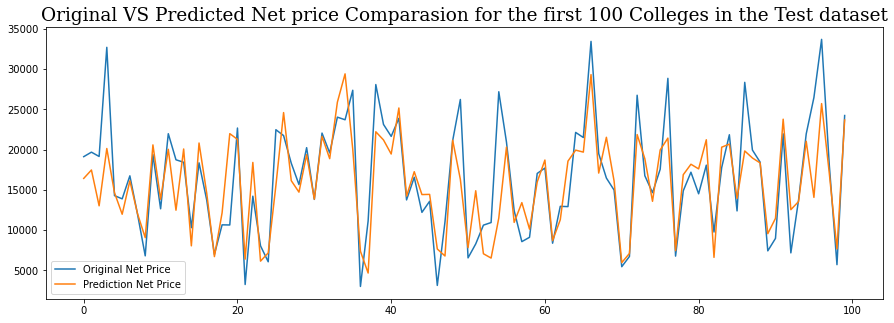

In [34]:
Fig , ax = plt.subplots(figsize = (15 ,5))
ax.plot(y_test[0:100], label = 'Original Net Price' )
ax.plot(test_predection[0:100], label = 'Prediction Net Price' )
plt.legend()
plt.title('Original VS Predicted Net price Comparasion for the first 100 Colleges in the Test dataset' , fontsize=18.5, 
         fontweight='light', 
         fontfamily='serif');

## Model Evaluation

In [35]:
from sklearn.metrics import mean_squared_error
print ('Root Mean square error for the train data , ' , 
       round(mean_squared_error(y_train, train_prediction , squared=False) , 2))
print ('Root Mean square error for the train data , ' ,
       round(mean_squared_error(y_test, test_predection , squared=False) , 2))

Root Mean square error for the train data ,  1916.76
Root Mean square error for the train data ,  4581.17


In [40]:
final_df = pd.DataFrame.from_dict({"original net price":y_train , "Predicted net price":train_prediction})
final_df = pd.DataFrame.round(final_df)
final_df['Percentage of Error %'] = abs(final_df['original net price']-final_df['Predicted net price'])/final_df['original net price']*100
final_df =final_df.round(1)
final_df.sample(20)

,original net price,Predicted net price,Percentage of Error %
780,23252.0,23371.0,0.5
2923,13282.0,12845.0,3.3
338,15216.0,15337.0,0.8
956,23594.0,23388.0,0.9
5093,26598.0,25346.0,4.7
3146,27518.0,27745.0,0.8
22,9357.0,8744.0,6.6
3535,9743.0,9132.0,6.3
685,10329.0,11122.0,7.7
1003,21267.0,20666.0,2.8


## Evaluating the Model (RMSE)

After Evaluation my predictor model I found the root mean  squared error for the train data was 1907 and for the test data was 4560  , it's noted that some further work should be done to avoid the over fitting of the model .
## Limitation

The future work in this project may include implementing some other machine learning models like knn (k-nearest neighbors), rpart (decision trees), etc., training the model with only top important features, exploring additional features related to institutes and demographics, and exploring other years’ cohort data.

Also the Data contain a big amount of Null values which effect the performance of the model  

Thanks for visiting my notebook  - Upvote if you found it useful
<h1 style = 'background-color:powderblue;border-style: solid'><center><strong><br> Thanks for visiting my notebook  - Upvote if you found it useful<br>